In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from twoDsampler import twoDsamplefromGaussian as tDsfG

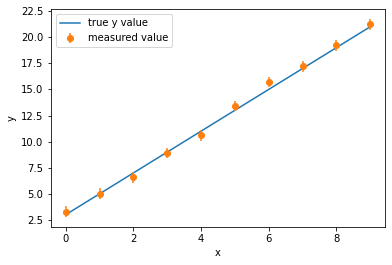

In [3]:
#making my probability function:

#set parameters, arrays
a=2
b=3
sig_y=0.5
data_len=10
y_i=np.zeros(data_len)
x_i=np.zeros(data_len)

def y_hat(x_i):
    return(a*x_i+b)

pi=np.pi
e=np.e

#create my x array, going to choose even spacing
x_i=np.arange(0,data_len)

from numpy import random
for i in range(len(x_i)):
    mean=a*x_i[i]+b
    sigma=sig_y

    s = np.random.normal(mean, sigma, 1)
    y_i[i]=s
    
#print(y_i)

plt.plot(x_i,y_hat(x_i), label="true y value")
plt.errorbar(x_i,y_i, yerr=sig_y, fmt='o', label="measured value")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")

a_guess=np.linspace(a*0.8,a*1.2,500)
b_guess=np.linspace(b*0.8,b*1.2,400)

aa,bb=np.meshgrid(a_guess,b_guess)
chi2vals = np.zeros(np.prod(aa.shape))

#probability function
def prob(point):
    a_val,b_val=point
    val= -0.5*np.sum(((y_i-(a_val*x_i+b_val))/(sig_y))**2 )
    return val


In [4]:
#print(prob([2,3])/prob([0,2]))
#print(prob([0,2])/prob([2,3]))
print(prob([2,3]))
print(-0.5*np.sum(((y_i-(2*x_i+3))/(sig_y))**2 ))
print(sig_y)

-2.415022721974287
-2.415022721974287
0.5


In [5]:
#need to sample through a,b space with 2D sampler
#the sampler moves along the gradient of the probability function

maxstepa=0.5
maxstepb=0.2
initialpoint=[0,0]
numsteps=10000
samples=tDsfG(prob, maxstepa, maxstepb, initialpoint, numsteps)


100%|████████████████████████████████████| 9999/9999 [00:00<00:00, 14319.51it/s]


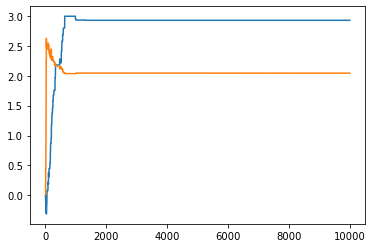

In [9]:
plt.plot(samples[:,1])
plt.plot(samples[:,0])

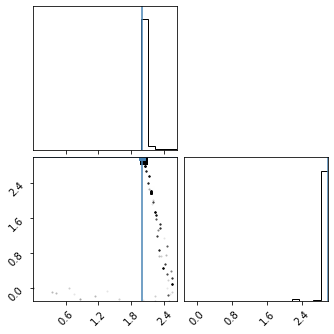

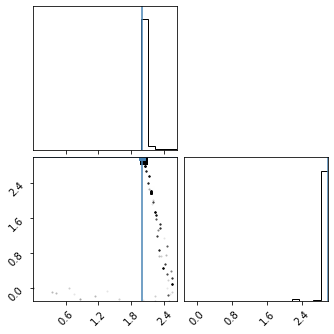

In [7]:
from corner import corner
corner(samples, truths = [2,3])

In [8]:
print(samples)

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [2.04193907 2.92502132]
 [2.04193907 2.92502132]
 [2.04193907 2.92502132]]
